In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

## 누락 데이터 처리

In [5]:
df = sns.load_dataset('titanic')
df.info() # deck의 누락데이터(NaN)이 688개라는 사실을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
nan_deck = df['deck'].value_counts(dropna=False) # NaN 포함 데이터 개수
print(nan_deck)
print('---------------------------------------------------')
print(df.head().isnull())
print('---------------------------------------------------')
print(df.head().notnull())
print('---------------------------------------------------')
print(df.head().isnull().sum(axis=0)) # 누락 데이터의 개수 구하기

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64
---------------------------------------------------
   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  
------------------------------------------

In [13]:
# 누락 데이터 제거

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()
    try:
        print(col,': ',missing_count[True]) # NaN값이 있으면 개수 출력
    except:
        print(col,': ',0) # NaN값이 없으면 0개 출력
print('---------------------------------------------------')
    
# NaN이 500개 이상인 열을 모두 삭제 - deck 열
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns)
print('---------------------------------------------------')

# age 열에 나이 데이터가 없는 모든 행 삭제
df_age = df.dropna(subset=['age'], how='any', axis=0)
print(len(df_age))

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
---------------------------------------------------
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')
---------------------------------------------------
714


In [17]:
# 누락 데이터 치환 : 평균으로 누락 데이터 바꾸기

mean_age = df['age'].mean(axis=0) # age 열의 평균 계산(NaN 제외)
df['age'].fillna(mean_age,inplace=True)

print(df['age'].head(10)) # 5번 인덱스가 평균으로 치환

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [20]:
# <예제 5-4> 누락 데이터 치환 :가장 많이 나타나는 값으로 바꾸기

print(df['embark_town'][827:830])
print('---------------------------------------------------')

most_freq = df['embark_town'].value_counts(dropna=True).idxmax() # NaN을 제외하고 가장 많이 출현한 값
print(most_freq)
print('---------------------------------------------------')

df['embark_town'].fillna(most_freq, inplace=True)
print(df['embark_town'][827:830])

827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object
---------------------------------------------------
Southampton
---------------------------------------------------
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [22]:
# 예제 5-5 : 이웃하고 있는 값으로 바꾸기

df = sns.load_dataset('titanic')

print(df['embark_town'][827:830])
print('---------------------------------------------------')

# method='ffill' > 직전 행에 있는 값으로 변경
# method='bfill' > 다음 행에 있는 값으로 변경
df['embark_town'].fillna(method='ffill', inplace=True)
print(df['embark_town'][827:830])

827     Cherbourg
828    Queenstown
829           NaN
Name: embark_town, dtype: object
---------------------------------------------------
827     Cherbourg
828    Queenstown
829    Queenstown
Name: embark_town, dtype: object


## 중복 데이터 처리

In [25]:
# 예제 5-6 : 중복 데이터 확인
# duplicated() : 전에 행과 비교해여 중복되는 행이면 True, 처음 나오면 False

df = pd.DataFrame({'c1':['a','a','b','a','b'],
                  'c2':[1,1,1,2,2],
                  'c3':[1,1,2,2,2]})
print(df)
print('---------------------------------------------------')

df_dup = df.duplicated()
print(df_dup)
print('---------------------------------------------------')

col_dup = df['c2'].duplicated() # 데이터프레임의 특정 열 데이터에서 중복값 찾기
print(col_dup)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
---------------------------------------------------
0    False
1     True
2    False
3    False
4    False
dtype: bool
---------------------------------------------------
0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


In [27]:
# 예제 5-7 : 중복 데이터 제거

df = pd.DataFrame({'c1':['a','a','b','a','b'],
                  'c2':[1,1,1,2,2],
                  'c3':[1,1,2,2,2]})
print(df)
print('---------------------------------------------------')

df2 = df.drop_duplicates() # 중복 행 제거
print(df2)
print('---------------------------------------------------')

df3 = df.drop_duplicates(subset=['c2','c3']) # c2,c3열을 기준으로 중복 행 제거
print(df3)

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
---------------------------------------------------
  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2
---------------------------------------------------
  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


## 데이터 표준화

In [31]:
# 예제 5-8 : 단위 환산

df = pd.read_csv('./auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
print(df.head())
print('---------------------------------------------------')

mpg_to_kpl = 1.60934/3.78541 # mpg를 kpl로 변환 (단위변경)
df['kpl'] = df['mpg'] * mpg_to_kpl
print(df.head(3))
print('---------------------------------------------------')

df['kpl'] = df['kpl'].round(2) # kpl 열을 소수점 아래 둘째자리에서 반올림
print(df.head(3))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
---------------------------------------------------
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5

In [35]:
# 예제 5-9 : 자료형 변환

df = pd.read_csv('./auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
print(df.dtypes)
print('---------------------------------------------------')

print(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print('---------------------------------------------------')

df['horsepower'].replace('?',np.nan, inplace=True) # ? 을 np.nan으로 변경
df.dropna(subset=['horsepower'],axis=0,inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df['horsepower'].dtypes)
print('---------------------------------------------------')

print(df['origin'].unique()) # origin 열의 고유값 확인

df['origin'].replace({1:'USA',2:'EU',3:'JPN'},inplace=True) # 정수형 데이터를 문자형 데이터로 변환
print(df['origin'].unique())
print(df['origin'].dtypes)
print('---------------------------------------------------')

# 유한 개의 고유값이 반복적으로 나타나는 경우에는 범주형 데이터로 표현하는 것이 효율적
df['origin'] = df['origin'].astype('category')
print(df['origin'].dtypes)
print('---------------------------------------------------')

# model year 열의 정수형을 범주형으로 변경
df['model year'] = df['model year'].astype('category')
print(df['model year'].sample(3))

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
dtype: object
---------------------------------------------------
['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' 

## 범주형(카테고리) 데이터 처리

In [3]:
df = pd.read_csv('./auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan, inplace=True) 
df.dropna(subset=['horsepower'],axis=0,inplace=True) 
df['horsepower'] = df['horsepower'].astype('float')

# np.histogram 함수로 3개의 bin으로 나누는 경계값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'],bins=3)
print(bin_dividers)

bin_names = ['저출력','보통출력','고출력'] # 3개의 bin에 이름 지정

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
df['hp_bin'] = pd.cut(x=df['horsepower'], # 데이터 배열
                     bins=bin_dividers, # 경계값 리스트
                     labels=bin_names, # bin 이름
                     include_lowest=True) # 첫 경계값 포함

print(df[['horsepower','hp_bin']].head(15))

[ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [5]:
# 예제 5-11 : 더미 변수
# 더미 변수 : 숫자 0이나 1으로 표현되는 변수(컴퓨터가 인식 가능한 입력값)
# 해당 특성이 존재하면 1로, 존재하지 않으면 0으로 구분 (=원핫벡터)

# hp_bin 열의 범주형 데이터를 더미 변수로 변환
horsepower_dummies = pd.get_dummies(df['hp_bin'])
print(horsepower_dummies.head(15))

    저출력  보통출력  고출력
0     0     1    0
1     0     1    0
2     0     1    0
3     0     1    0
4     0     1    0
5     0     0    1
6     0     0    1
7     0     0    1
8     0     0    1
9     0     0    1
10    0     0    1
11    0     1    0
12    0     1    0
13    0     0    1
14    1     0    0


# 원핫인코딩

scikit-learn에서 제공하는 머신러닝 알고리즘은 문자열 값을 입력값으로 허락하지 않음 
 > 모든 문자열 값들을 숫자형으로 인코딩 전처리 필요

scikit-learn 머신러닝 알고리즘 데이터 조건
1. 모든 데이터는 숫자로 구성되어야 함
2. 데이터에 빈 값이 없어야 함

hp_bin 내의 값들은 문자형이므로 각기 다른 숫자형 데이터로 변경 필요
 > 저출력:2, 보통출력:1, 고출력:0

# 희소행렬

행렬 안에 많은 항들이 0으로 되어있는 행렬
그대로 사용하면 메모리 낭비가 심하므로 (행,열,값)의 형태로 0이 아닌 값들만 추려 그 정보들만 저장
아래 예시는 horsepower_dummies(희소행렬)을 표현한 것
> ex) (0,1) 1.0 : 0번째 행, 1번째 열, 값 1.0

In [7]:
# 예제 5-12 : 원핫인코딩

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled) # 저출력:2, 보통출력:1, 고출력:0으로
print(type(onehot_labeled))

# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled),1)
print(onehot_reshaped)
print(type(onehot_reshaped))

# 회소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse._csr.csr_matrix'>


## 정규화

In [2]:
# 예제 5-13 : 정규화

# 정규화 : 각 열(변수)에 속하는 데이터 값을 동일한 크기 기준으로 나눈 비율로 나타내는 것
# 정규화 과정을 거친 데이터의 범위는 0~1 또는 -1~1이 된다.

df = pd.read_csv('./auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan, inplace=True) 
df.dropna(subset=['horsepower'],axis=0,inplace=True) 
df['horsepower'] = df['horsepower'].astype('float')

print(df.horsepower.describe())
print('---------------------------------------------------')

# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower/abs(df.horsepower.max())
print(df.horsepower.head())
print('---------------------------------------------------')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
---------------------------------------------------
0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64
---------------------------------------------------
count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [3]:
# 예제 5-14 : 정규화

df = pd.read_csv('./auto-mpg.csv',header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['horsepower'].replace('?',np.nan, inplace=True) 
df.dropna(subset=['horsepower'],axis=0,inplace=True) 
df['horsepower'] = df['horsepower'].astype('float')

print(df.horsepower.describe())
print('---------------------------------------------------')

# horsepower 열의 최대값의 절댓값으로 모든 데이터를 나눠서 저장
min_x = df.horsepower - df.horsepower.min()
min_max = df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x/min_max

print(df.horsepower.head())
print('---------------------------------------------------')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
---------------------------------------------------
0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64
---------------------------------------------------
count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


## 시계열 데이터

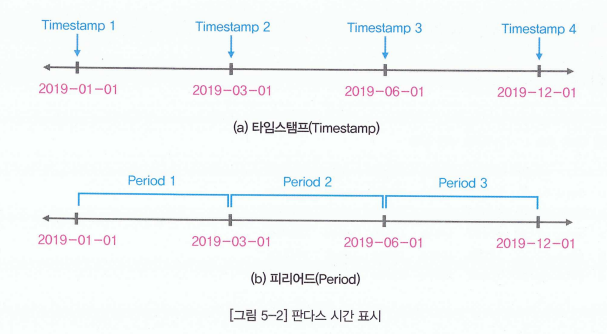

In [8]:
# 예제 5-15 : 문자열을 Timestamp로 변환

df = pd.read_csv('stock-data.csv')
print(df.head())
print(df.info()) # Date가 object로 되어있음을 확인
print('---------------------------------------------------')

df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print(df.info())
print(type(df['new_Date'][0]))
print('---------------------------------------------------')

# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정, 기존 날짜 열은 삭제
df.set_index('new_Date', inplace=True)
df.drop('Date',axis=1,inplace=True)

print(df.head())
print(df.info())

         Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None
---------------------------------------------------
         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400

In [11]:
# 예제 5-16 : Timestamp를 Period로 변환

dates = ['2019-01-01','2020-03-01','2021-06-01']

ts_dates = pd.to_datetime(dates)
print(ts_dates)
print('---------------------------------------------------')

# Timestamp를 period로 변환
pr_day = ts_dates.to_period(freq='D')
print(pr_day)
pr_month = ts_dates.to_period(freq='M')
print(pr_month)
pr_year = ts_dates.to_period(freq='A')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
---------------------------------------------------
PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]')


In [13]:
# 예제 5-17 : Timestamp 배열 만들기

ts_ms = pd.date_range(start='2019-01-01', # 날짜 범위 시작
                     end=None, # 날짜 범위 끝
                     periods=6, # 생성할 Timestamp 개수
                     freq='MS', # 시간 간격(MS:월의 시작일)
                     tz='Asia/Seoul') # 시간대(timezone)
print(ts_ms)
print('---------------------------------------------------')

# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6,
                     freq='M', # 시간 간격(M : 월의 마지막날)
                     tz='Asia/Seoul')
print(ts_me)
print('---------------------------------------------------')

ts_3m = pd.date_range('2019-01-01', periods=6,
                     freq='3M', # 시간 간격(3M : 3개월)
                     tz='Asia/Seoul')
print(ts_3m)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')
---------------------------------------------------
DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')
---------------------------------------------------
DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [15]:
# 예제 5-18 : Period 배열 만들기

pr_m = pd.period_range(start='2019-01-01',
                       end=None,
                       periods=6,
                     freq='M')
print(pr_m)
print('---------------------------------------------------')

# 1시간 길이
pr_h = pd.period_range(start='2019-01-01',
                       end=None,
                       periods=3,
                     freq='H')
print(pr_h)
print('---------------------------------------------------')

# 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',
                       end=None,
                       periods=3,
                     freq='2H')
print(pr_2h)

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06'], dtype='period[M]')
---------------------------------------------------
PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')
---------------------------------------------------
PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


In [19]:
# 예제 5-19 : 날짜 데이터 분리

df = pd.read_csv('stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('---------------------------------------------------')

# dt 속성을 이용하여 new_Date 열의 연-월-일 저보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
print(df.head())
print('---------------------------------------------------')

# Timestamp를 Period로 변환하여 연-월-일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
print(df.head())
print('---------------------------------------------------')

# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m',inplace=True)
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26
---------------------------------------------------
         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26
---------------------------------------------------
         Date  Close  Start   High    Low  Volume   new_

In [46]:
# 예제 5-20 : 날짜 인덱스 활용

df = pd.read_csv('stock-data.csv')
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date',inplace=True)
print(df.head())
print(df.index)
print('---------------------------------------------------')

# 날짜 인덱스를 이용하여 데이터 선택하기
df_y = df['2018']
print(df_y.head())
print('---------------------------------------------------')

df_ym = df['2018-07']
print(df_ym)
print('---------------------------------------------------')

df_ymd = df.loc['2018-06-20'] # loc을 사용해야 오류가 나지 않음
print(df_ymd)
print('---------------------------------------------------')

df_ym_cols = df.loc['2018-07','Start':'High']
print(df_ym_cols)
print('---------------------------------------------------')

df_ymd_range = df['2018-06-20':'2018-06-25'] # 교재에는 20일, 25일 순서가 바뀜
print(df_ymd_range)
print('---------------------------------------------------')

# 시간 간격 계산, 최근 180일~189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25') # 기준일 생성
df['time_delta'] = today - df.index # 날짜 차이 계산
df.set_index('time_delta',inplace=True) # 행 인덱스로 지정
df_180 = df['180 days':'189 days']
print(df_180)

                  Date  Close  Start   High    Low  Volume
new_Date                                                  
2018-07-02  2018-07-02  10100  10850  10900  10000  137977
2018-06-29  2018-06-29  10700  10550  10900   9990  170253
2018-06-28  2018-06-28  10400  10900  10950  10150  155769
2018-06-27  2018-06-27  10900  10800  11050  10500  133548
2018-06-26  2018-06-26  10800  10900  11000  10700   63039
DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-05', '2018-06-04', '2018-06-01'],
              dtype='datetime64[ns]', name='new_Date', freq=None)
---------------------------------------------------
                  Date  Close  Start   High    Low  Volume
new_Date                                              

C:\Users\user\AppData\Local\Temp\ipykernel_22984\179068140.py:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_y = df['2018']
C:\Users\user\AppData\Local\Temp\ipykernel_22984\179068140.py:15: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_ym = df['2018-07']
